# Laboratorio 3 - Parte 2

### Arboles de decisión y Random Forest

### 2018-II

#### Profesor: Julián D. Arias Londoño
#### julian.ariasl@udea.edu.co


## Guía del laboratorio

En esta archivo va a encontrar tanto celdas de código cómo celdas de texto con las instrucciones para desarrollar el laboratorio.

Lea atentamente las instrucciones entregadas en las celdas de texto correspondientes y proceda con la solución de las preguntas planteadas.

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

### Primer integrante:
Nombre: Alejandro Castaño Rojas

### Segundo integrante:
Nombre: Angélica Arroyave Mendoza

In [78]:
from __future__ import division
%matplotlib inline
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from scipy import stats
from numpy import random


#Algunas advertencias que queremos evitar
import warnings
warnings.filterwarnings("always")

## Ejercicio 1

A continuación se leen los datos de un problema de clasificación. El problema corresponde a la clasifiación de dígitos escritos a mano, el cual fue abordado en el laboratorio anterior. Usaremos únicamente 4 de las 10 clases disponibles. Los datos fueron preprocesados para reducir el número de características. La técnica usada será analizada más adelante en el curso.

In [79]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
digits = load_digits(n_class=4)

#--------- preprocesamiento--------------------
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)

#---------- Datos a usar ----------------------
X = data
Y = digits.target
    

En la siguiente celda se define una simulación para entrenar y validar un modelo usando los datos previamente cargados. Complete el código para usar como modelo de predicción un arbol de decisión. Debe consultar todo lo relacionado con la creación, entrenamiento y uso en predicción de este modelo usando la librería scikit-learn. Consultar aquí: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

<b>Note</b> que existe una clase para modelos de clasificación y otra para modelos de regresión:
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [81]:
import math
import numpy as np
import numpy.matlib
from numpy import random
from sklearn import tree
from sklearn.model_selection import StratifiedKFold


#Validamos el modelo
depths = [5,10,20,30,50]
table = []
for depth in depths:
    Folds = 4
    random.seed(19680801)
    EficienciaTrain = np.zeros(Folds)
    EficienciaVal = np.zeros(Folds)
    skf = StratifiedKFold(n_splits=Folds)
    j = 0
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    print('Profundidad: ', depth)
    for train, test in skf.split(X, Y):
        Xtrain = X[train,:]
        Ytrain = Y[train]
        Xtest = X[test,:]
        Ytest = Y[test]
        
        #Normalizamos los datos
        media = np.mean(Xtrain)
        desvia = np.std(Xtrain)
        Xtrain = sc.stats.stats.zscore(Xtrain)
        Xtest = (Xtest - np.matlib.repmat(media, Xtest.shape[0], 1))/np.matlib.repmat(desvia, Xtest.shape[0], 1)
        
        #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
        model = clf.fit(Xtrain, Y[train])
        
        
        
        #Validación 
        #Use el modelo previamente entrenado para hacer predicciones con las mismas muestras de entrenamiento
        Ytrain_pred = model.predict(Xtrain)
        #Use el modelo previamente entrenado para hacer predicciones con las muestras de test
        Yest = model.predict(Xtest)
       
        
        #Evaluamos las predicciones del modelo con los datos de test
        EficienciaTrain[j] = np.mean(Ytrain_pred.ravel() == Ytrain.ravel())
        EficienciaVal[j] = np.mean(Yest.ravel() == Ytest.ravel())
        j += 1
    table.append((str(np.mean(EficienciaVal)),  str(np.std(EficienciaVal))))     
    print('Eficiencia durante el entrenamiento = ' + str(np.mean(EficienciaTrain)) + '+-' + str(np.std(EficienciaTrain)))
    print('Eficiencia durante la validación = ' + str(np.mean(EficienciaVal)) + '+-' + str(np.std(EficienciaVal)))


Profundidad:  5
Eficiencia durante el entrenamiento = 0.9828770703537302+-0.004584704067609588
Eficiencia durante la validación = 0.9111884805947097+-0.044609582556530296
Profundidad:  10
Eficiencia durante el entrenamiento = 1.0+-0.0
Eficiencia durante la validación = 0.9013808190321215+-0.032391925101484476
Profundidad:  20
Eficiencia durante el entrenamiento = 1.0+-0.0
Eficiencia durante la validación = 0.9013808190321215+-0.032391925101484476
Profundidad:  30
Eficiencia durante el entrenamiento = 1.0+-0.0
Eficiencia durante la validación = 0.9013808190321215+-0.032391925101484476
Profundidad:  50
Eficiencia durante el entrenamiento = 1.0+-0.0
Eficiencia durante la validación = 0.9013808190321215+-0.032391925101484476


Responda:

1.1 ¿Cuáles criterios para detener el crecimiento del árbol o de los nodos están disponibles en la librería?: <br>
**R//** Tenemos disponible: <br>
**a.** max_depth. <br>
**b.** min_samples_split. <br>
**c.** min_samples_leaf.<br>

1.2. ¿Cuáles son los parámetros asociados con los criterios enumerados en el punto anterior?:<br>
**R//**<br>
**a.** max_depth(int, float): La profundidad máxima del árbol.<br>
**b.** min_samples_split(int, float): El número mínimo de muestras necesarias para dividir un nodo interno.<br>
**c.** min_samples_leaf(int, float): El número mínimo de muestras necesarias para estar en un nodo hoja.<br>


## Ejercicio 2

Una vez completado el código realice los experimentos necesarios para llenar la siguiente tabla:

In [82]:
import pandas as pd
import qgrid
randn = np.random.randn
df_types = pd.DataFrame({
    'Maxima profundidad' : pd.Series([5,10,20,30,50])})
df_types["Eficiencia en validacion"] = ""
df_types["Intervalo de confianza"] = ""
df_types.set_index(['Maxima profundidad'], inplace=True)
#df_types.sort_index(inplace=True)
j = 0;
for i in df_types.index:
    df_types["Eficiencia en validacion"][i]= str(table[j][0])
    df_types["Intervalo de confianza"][i] = str(table[j][1])
    j+=1
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

Ejecute la siguiente instrucción para dejar guardados en el notebook los resultados de las pruebas.

In [83]:
qgrid_widget.get_changed_df()

,Eficiencia en validacion,Intervalo de confianza
Maxima profundidad,,
5,0.9111884805947097,0.044609582556530296
10,0.9013808190321215,0.032391925101484476
20,0.9013808190321215,0.032391925101484476
30,0.9013808190321215,0.032391925101484476
50,0.9013808190321215,0.032391925101484476


Responda: 
    
2.1 ¿Tiene algún efecto la normalización o estándarización de las variables en el desempeño del modelo de árboles de decisión? Explique su respuesta. <br>
**R//** No existe algún efecto significativo.

## Ejercicio 3

En la siguiente celda se define una simulación para entrenar y validar un modelo usando los datos previamente cargados. Complete el código para usar como modelo de predicción un Random Forest. Debe consultar todo lo relacionado con la creación, entrenamiento y uso en predicción de este modelo usando la librería scikit-learn. Consultar aquí: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html 

<b>Note</b> que al igual que en el caso anterior, existe una clase para modelos de clasificación y otra para modelos de regresión: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [84]:
#Validamos el modelo
from sklearn.ensemble import RandomForestClassifier
trees = [5,5,5,5,5,5,10,10,10,10,10,10,20,20,20,20,20,20,50,50,50,50,50,50,100,100,100,100,100,100]
variables =[5,10,15,20,25,30,5,10,15,20,25,30,5,10,15,20,25,30,5,10,15,20,25,30,5,10,15,20,25,30]
resultTable = []
for tree, variable in zip(trees, variables):
    Folds = 4
    random.seed(19680801)
    EficienciaTrain = np.zeros(Folds)
    EficienciaVal = np.zeros(Folds)
    skf = StratifiedKFold(n_splits=Folds)
    j = 0
    rfc = RandomForestClassifier(n_estimators=tree, max_features=variable)
    for train, test in skf.split(X, Y):
        Xtrain = X[train,:]
        Ytrain = Y[train]
        Xtest = X[test,:]
        Ytest = Y[test]
    
        #Normalizamos los datos
        media = np.mean(Xtrain)
        desvia = np.std(Xtrain)
        Xtrain = sc.stats.stats.zscore(Xtrain)
        Xtest = (Xtest - np.matlib.repmat(media, Xtest.shape[0], 1))/np.matlib.repmat(desvia, Xtest.shape[0], 1)
    
        #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
    
        model = rfc.fit(Xtrain, Ytrain)
    
    
    
        #Validación
        #Use el modelo previamente entrenado para hacer predicciones con las mismas muestras de entrenamiento
        Ytrain_pred = model.predict(Xtrain)
        #Use el modelo previamente entrenado para hacer predicciones con las muestras de test
        Yest = model.predict(Xtest)
        #Evaluamos las predicciones del modelo con los datos de test
        EficienciaTrain[j] = np.mean(Ytrain_pred.ravel() == Ytrain.ravel())
        EficienciaVal[j] = np.mean(Yest.ravel() == Ytest.ravel())
        j += 1
    resultTable.append((str(np.mean(EficienciaVal)),  str(np.std(EficienciaVal))))         
    print('Eficiencia durante el entrenamiento = ' + str(np.mean(EficienciaTrain)) + '+-' + str(np.std(EficienciaTrain)))
    print('Eficiencia durante la validación = ' + str(np.mean(EficienciaVal)) + '+-' + str(np.std(EficienciaVal)))


Eficiencia durante el entrenamiento = 0.9981464175877974+-0.0013118964944189703
Eficiencia durante la validación = 0.8777529077694397+-0.014338139113272093
Eficiencia durante el entrenamiento = 0.9949099238990007+-0.0027269938968843836
Eficiencia durante la validación = 0.9249171609514608+-0.03644770442982503
Eficiencia durante el entrenamiento = 0.9986128162861881+-0.0008008994293518913
Eficiencia durante la validación = 0.937502185836855+-0.01540481302780255
Eficiencia durante el entrenamiento = 0.9976860250624457+-0.0007984236624606809
Eficiencia durante la validación = 0.9362140803004042+-0.027417037303269644
Eficiencia durante el entrenamiento = 0.9962962550164862+-0.001851945524107368
Eficiencia durante la validación = 0.9027698808390645+-0.02776807945552732
Eficiencia durante el entrenamiento = 0.9953677586353733+-0.0009388043015629532
Eficiencia durante la validación = 0.9237127927122086+-0.03279669769652372
Eficiencia durante el entrenamiento = 0.9995378927911276+-0.0008003931

Una vez completado el código realice los experimentos necesarios para llenar la siguiente tabla:

In [85]:
import pandas as pd
import qgrid
randn = np.random.randn
n_arboles = [5,5,5,5,5,5,10,10,10,10,10,10,20,20,20,20,20,20,50,50,50,50,50,50,100,100,100,100,100,100]
n_variables_analizadas = [5,10,15,20,25,30,5,10,15,20,25,30,5,10,15,20,25,30,5,10,15,20,25,30,5,10,15,20,25,30]
df_types = pd.DataFrame({
    'Numero de arboles' : pd.Series(n_arboles), 
    'Variables analizadas por nodo' : pd.Series(n_variables_analizadas)})
df_types["Eficiencia en validacion"] = ""
df_types["Intervalo de confianza"] = ""
df_types.set_index(['Numero de arboles','Variables analizadas por nodo'], inplace=True)
#df_types.sort_index(inplace=True)
i = 0
for n_arbol, n_va, resultTableTuple in zip(n_arboles, n_variables_analizadas, resultTable):
    efi,conf = resultTableTuple
    df_types["Eficiencia en validacion"][n_arbol][n_va]= str(efi)
    df_types["Intervalo de confianza"][n_arbol][n_va] = str(conf)
    i+=1
qgrid_widget2 = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget2

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

Ejecute la siguiente instrucción para dejar guardados en el notebook los resultados de las pruebas.

In [86]:
qgrid_widget2.get_changed_df()

Eficiencia en validacion  \
Numero de arboles Variables analizadas por nodo                            
5                 5                                   0.8777529077694397   
                  10                                  0.9249171609514608   
                  15                                   0.937502185836855   
                  20                                  0.9362140803004042   
                  25                                  0.9027698808390645   
                  30                                  0.9237127927122086   
10                5                                   0.9153172089111556   
                  10                                  0.9265222988171765   
                  15                                   0.923604498870598   
                  20                                   0.925032275023267   
                  25                                  0.9223007120924365   
                  30                                   0.922347012675912   
20                5                                   0.9458904349250268   
                  10                                  0.9348014851979463   
                  15                                  0.9388292515274258   
                  20                                  0.9333274113200392   
                  25                                  0.9264291803093025   
                  30                                  0.9306345598766973   
50                5                                   0.9554665935702371   
                  10                                  0.9527502059731432   
                  15                                  0.9471712000321221   
                  20                                  0.9347475955184837   
                  25                                  0.9375484807038562   
                  30                                  0.9250092533522006   
100               5                                   0.9693878081155345   
                  10                                  0.9582677359969523   
                  15                                  0.9416463381536689   
                  20                                  0.9346934514559158   
                  25                                  0.9347240593647319   
                  30                                  0.9292300654946748   

                                                Intervalo de confianza  
Numero de arboles Variables analizadas por nodo                         
5                 5                               0.014338139113272093  
                  10                               0.03644770442982503  
                  15                               0.01540481302780255  
                  20                              0.027417037303269644  
                  25                               0.02776807945552732  
                  30                               0.03279669769652372  
10                5                                0.03362828792996027  
                  10                              0.024224533125019335  
                  15                              0.034535442829414745  
                  20                              0.025014339189166224  
                  25                              0.026769798878938895  
                  30                              0.030413218109941804  
20                5                               0.015236054514040243  
                  10                              0.024835179022336708  
                  15                              0.022897569085662515  
                  20                               0.02439902945757216  
                  25                              0.025221692665524972  
                  30                              0.027807838189991822  
50                5                               0.020781731387497254  
                  10                              0.023971672675170516  
         

Responda:
    
3.1 Realice una prueba adicional empleando el total de variables para la selección del mejor umbral en cada nodo ¿De acuerdo con los resultados es mejor usar un bagging de árboles o Random Forest? Explique su respuesta.    

In [87]:
muestras, caracteristicas = X.shape
print(caracteristicas)

39


In [88]:
#Validamos el modelo
from sklearn.ensemble import BaggingClassifier
trees = [5,5,5,5,5,5,10,10,10,10,10,10,20,20,20,20,20,20,50,50,50,50,50,50,100,100,100,100,100,100]
resultTB = []
for tree in trees:
    Folds = 4
    random.seed(19680801)
    EficienciaTrain = np.zeros(Folds)
    EficienciaVal = np.zeros(Folds)
    skf = StratifiedKFold(n_splits=Folds)
    j = 0
    bgg = BaggingClassifier(n_estimators=tree, max_features=caracteristicas)
    for train, test in skf.split(X, Y):
        Xtrain = X[train,:]
        Ytrain = Y[train]
        Xtest = X[test,:]
        Ytest = Y[test]
    
        #Normalizamos los datos
        media = np.mean(Xtrain)
        desvia = np.std(Xtrain)
        Xtrain = sc.stats.stats.zscore(Xtrain)
        Xtest = (Xtest - np.matlib.repmat(media, Xtest.shape[0], 1))/np.matlib.repmat(desvia, Xtest.shape[0], 1)
    
        #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
    
        model = bgg.fit(Xtrain, Ytrain)
    
    
    
        #Validación
        #Use el modelo previamente entrenado para hacer predicciones con las mismas muestras de entrenamiento
        Ytrain_pred = model.predict(Xtrain)
        #Use el modelo previamente entrenado para hacer predicciones con las muestras de test
        Yest = model.predict(Xtest)
        #Evaluamos las predicciones del modelo con los datos de test
        EficienciaTrain[j] = np.mean(Ytrain_pred.ravel() == Ytrain.ravel())
        EficienciaVal[j] = np.mean(Yest.ravel() == Ytest.ravel())
        j += 1
    resultTB.append((str(np.mean(EficienciaVal)),  str(np.std(EficienciaVal))))         
    #print('Eficiencia durante el entrenamiento = ' + str(np.mean(EficienciaTrain)) + '+-' + str(np.std(EficienciaTrain)))
    #print('Eficiencia durante la validación = ' + str(np.mean(EficienciaVal)) + '+-' + str(np.std(EficienciaVal)))


In [89]:
#Validamos el modelo
from sklearn.ensemble import RandomForestClassifier
trees = [5,5,5,5,5,5,10,10,10,10,10,10,20,20,20,20,20,20,50,50,50,50,50,50,100,100,100,100,100,100]
resultTR = []
for tree in trees:
    Folds = 4
    random.seed(19680801)
    EficienciaTrain = np.zeros(Folds)
    EficienciaVal = np.zeros(Folds)
    skf = StratifiedKFold(n_splits=Folds)
    j = 0
    rfc = RandomForestClassifier(n_estimators=tree, max_features=caracteristicas)
    for train, test in skf.split(X, Y):
        Xtrain = X[train,:]
        Ytrain = Y[train]
        Xtest = X[test,:]
        Ytest = Y[test]
    
        #Normalizamos los datos
        media = np.mean(Xtrain)
        desvia = np.std(Xtrain)
        Xtrain = sc.stats.stats.zscore(Xtrain)
        Xtest = (Xtest - np.matlib.repmat(media, Xtest.shape[0], 1))/np.matlib.repmat(desvia, Xtest.shape[0], 1)
    
        #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
    
        model = rfc.fit(Xtrain, Ytrain)
    
    
    
        #Validación
        #Use el modelo previamente entrenado para hacer predicciones con las mismas muestras de entrenamiento
        Ytrain_pred = model.predict(Xtrain)
        #Use el modelo previamente entrenado para hacer predicciones con las muestras de test
        Yest = model.predict(Xtest)
        #Evaluamos las predicciones del modelo con los datos de test
        EficienciaTrain[j] = np.mean(Ytrain_pred.ravel() == Ytrain.ravel())
        EficienciaVal[j] = np.mean(Yest.ravel() == Ytest.ravel())
        j += 1
    resultTR.append((str(np.mean(EficienciaVal)),  str(np.std(EficienciaVal))))         
    #print('Eficiencia durante el entrenamiento = ' + str(np.mean(EficienciaTrain)) + '+-' + str(np.std(EficienciaTrain)))
    #print('Eficiencia durante la validación = ' + str(np.mean(EficienciaVal)) + '+-' + str(np.std(EficienciaVal)))


In [90]:
bagging = []
random = []
for baggTupla, rfTupla in zip(resultTB, resultTR):
    print(baggTupla, rfTupla)
    bagging.append(baggTupla)
    random.append(rfTupla)

('0.9138509842288154', '0.021598761035049187') ('0.9138664168038948', '0.024561465718761794')
('0.9138509842288154', '0.021598761035049187') ('0.9138664168038948', '0.024561465718761794')
('0.9138509842288154', '0.021598761035049187') ('0.9138664168038948', '0.024561465718761794')
('0.9138509842288154', '0.021598761035049187') ('0.9138664168038948', '0.024561465718761794')
('0.9138509842288154', '0.021598761035049187') ('0.9138664168038948', '0.024561465718761794')
('0.9138509842288154', '0.021598761035049187') ('0.9138664168038948', '0.024561465718761794')
('0.9126086676513916', '0.03797258250913083') ('0.91953828115321', '0.02983613998326646')
('0.9126086676513916', '0.03797258250913083') ('0.91953828115321', '0.02983613998326646')
('0.9126086676513916', '0.03797258250913083') ('0.91953828115321', '0.02983613998326646')
('0.9126086676513916', '0.03797258250913083') ('0.91953828115321', '0.02983613998326646')
('0.9126086676513916', '0.03797258250913083') ('0.91953828115321', '0.029836

In [91]:
import pandas as pd
import qgrid
randn = np.random.randn
n_arboles = [5,5,5,5,5,5,10,10,10,10,10,10,20,20,20,20,20,20,50,50,50,50,50,50,100,100,100,100,100,100]
df_types = pd.DataFrame({
    'Numero de arboles' : pd.Series(n_arboles)})
df_types["E. validacion Bagging"] = ""
df_types["I. confianza Bagging"] = ""
df_types["E. validacion Random"] = ""
df_types["I. confianza Random"] = ""
df_types.set_index(['Numero de arboles'], inplace=True)
#df_types.sort_index(inplace=True)
i = 0
for baggTupla, rfTupla, arbol in zip(resultTB, resultTR, n_arboles):
    df_types["E. validacion Bagging"][arbol] = str(baggTupla[0])
    df_types["I. confianza Bagging"][arbol] = str(baggTupla[1])
    df_types["E. validacion Random"][arbol] = str(rfTupla[0])
    df_types["I. confianza Random"][arbol] = str(rfTupla[1])
    i+=1
qgrid_widget2 = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget2

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [92]:
qgrid_widget2.get_changed_df()

,E. validacion Bagging,I. confianza Bagging,E. validacion Random,I. confianza Random
Numero de arboles,,,,
5,0.9138509842288154,0.021598761035049187,0.9138664168038948,0.024561465718761794
5,0.9138509842288154,0.021598761035049187,0.9138664168038948,0.024561465718761794
5,0.9138509842288154,0.021598761035049187,0.9138664168038948,0.024561465718761794
5,0.9138509842288154,0.021598761035049187,0.9138664168038948,0.024561465718761794
5,0.9138509842288154,0.021598761035049187,0.9138664168038948,0.024561465718761794
5,0.9138509842288154,0.021598761035049187,0.9138664168038948,0.024561465718761794
10,0.9126086676513916,0.03797258250913083,0.91953828115321,0.02983613998326646
10,0.9126086676513916,0.03797258250913083,0.91953828115321,0.02983613998326646
10,0.9126086676513916,0.03797258250913083,0.91953828115321,0.02983613998326646


**R//** De acuerdo a las medidas de eficiencia arrojadas por cada modelo, podemos deducir que es mejor usar Random Forest que Bagging dado que nos dá eficiencias mayores respecto al Bagging

## Ejercicio 4

Utilice el paquete time (instrucción time.clock()) para medir el efecto del número de árboles y de la cantidad de variables a analizar por nodo, en el tiempo que tarda el entrenamiento del modelo Random Forest. Construya una gráfica de tiempo vs número de árboles, dejando constante el número de variables en 20, y una gráfica de tiempo vs número de variables dejando constante el número de árboles en 30.

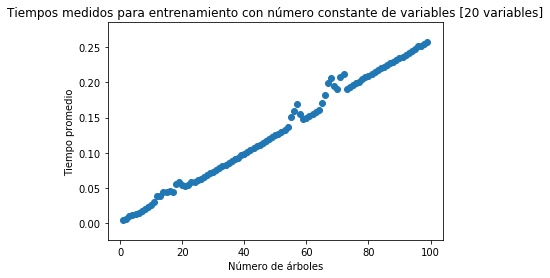

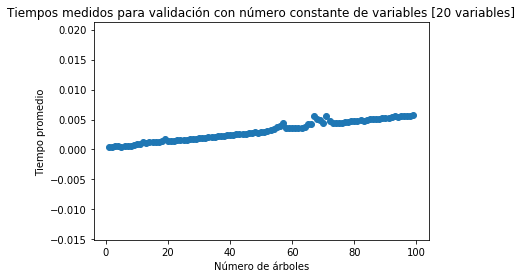

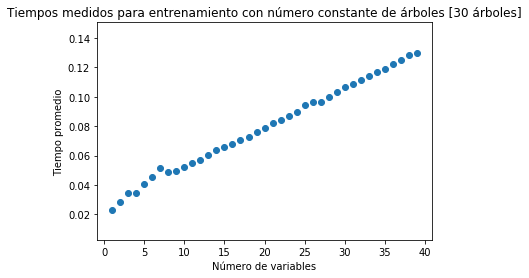

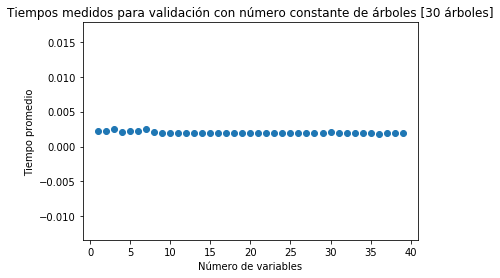

In [98]:
import time
from sklearn.ensemble import RandomForestClassifier
from numpy import random

training_times_with_constant_number_of_variables = []
test_times_with_constant_number_of_variables = []
training_times_with_constant_number_of_trees = []
test_times_with_constant_number_of_trees = []

def executeTestWithRandomForest(number_of_trees, number_of_variables):
    training_times = []
    test_times = []
    Folds = 4
    random.seed(19680801)
    EficienciaTrain = np.zeros(Folds)
    EficienciaVal = np.zeros(Folds)
    skf = StratifiedKFold(n_splits=Folds)
    j = 0
    rfc = RandomForestClassifier(n_estimators=number_of_trees, max_features=number_of_variables)
    for train, test in skf.split(X, Y):
        Xtrain = X[train,:]
        Ytrain = Y[train]
        Xtest = X[test,:]
        Ytest = Y[test]
        #Normalizamos los datos
        media = np.mean(Xtrain)
        desvia = np.std(Xtrain)
        Xtrain = sc.stats.stats.zscore(Xtrain)
        Xtest = (Xtest - np.matlib.repmat(media, Xtest.shape[0], 1))/np.matlib.repmat(desvia, Xtest.shape[0], 1)
        
        #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
        training_start_time = time.time()
        model = rfc.fit(Xtrain, Ytrain)
        training_end_time = time.time()
        delta_training_time = training_end_time - training_start_time
        #Validación
        #Use el modelo previamente entrenado para hacer predicciones con las mismas muestras de entrenamiento
        Ytrain_pred = model.predict(Xtrain)
        #Use el modelo previamente entrenado para hacer predicciones con las muestras de test
        test_start_time = time.time()
        Yest = model.predict(Xtest)
        test_end_time = time.time()
        delta_test_time = test_end_time - test_start_time
        #Evaluamos las predicciones del modelo con los datos de test
        EficienciaTrain[j] = np.mean(Ytrain_pred.ravel() == Ytrain.ravel())
        EficienciaVal[j] = np.mean(Yest.ravel() == Ytest.ravel())
        j += 1
        training_times.append(delta_training_time)
        test_times.append(delta_test_time)
    return [np.mean(training_times), np.mean(test_times)]

# Ejecutamos pruebas para el modelo con número constante de variables [20 variables].
n_trees_arr = []
n_vars_arr = []
MAX_NUMBER_OF_TREES_TO_EVAL = 100
MAX_NUMBER_OF_VARIABLES_TO_EVAL = 39
for n_trees_to_test in range(1,MAX_NUMBER_OF_TREES_TO_EVAL):
    training_time, test_time = executeTestWithRandomForest(n_trees_to_test, 20)
    training_times_with_constant_number_of_variables.append(training_time)
    test_times_with_constant_number_of_variables.append(test_time)
    n_trees_arr.append(n_trees_to_test)

plt.title('Tiempos medidos para entrenamiento con número constante de variables [20 variables]')
plt.scatter(n_trees_arr, training_times_with_constant_number_of_variables, cmap='gist_rainbow')
plt.xlabel('Número de árboles')
plt.ylabel('Tiempo promedio')
plt.show()
plt.title('Tiempos medidos para validación con número constante de variables [20 variables]')
plt.scatter(n_trees_arr, test_times_with_constant_number_of_variables, cmap='gist_rainbow')
plt.xlabel('Número de árboles')
plt.ylabel('Tiempo promedio')
plt.show()

# Ejecutamos pruebas para el modelo con número constante de árboles [30 árboles]
for n_vars_to_test in range(1, MAX_NUMBER_OF_VARIABLES_TO_EVAL + 1):
    training_time, test_time = executeTestWithRandomForest(30, n_vars_to_test)
    training_times_with_constant_number_of_trees.append(training_time)
    test_times_with_constant_number_of_trees.append(test_time)
    n_vars_arr.append(n_vars_to_test)

plt.title('Tiempos medidos para entrenamiento con número constante de árboles [30 árboles]')
plt.scatter(n_vars_arr, training_times_with_constant_number_of_trees, cmap='gnuplot')
plt.xlabel('Número de variables')
plt.ylabel('Tiempo promedio')
plt.show()
plt.title('Tiempos medidos para validación con número constante de árboles [30 árboles]')
plt.scatter(n_vars_arr, test_times_with_constant_number_of_trees, cmap='gnuplot')
plt.xlabel('Número de variables')
plt.ylabel('Tiempo promedio')
plt.show()